In [63]:
import pandas as pd
import seaborn as sns

In [68]:
paths = '/home/aaristov/Multicell/Sebastien/Dars/combined_results_chips_96w_1_2.csv'
data = pd.read_csv(paths)
(data).shape

(521, 13)

In [69]:
data

path     size_um  \
0                                  24092020/Chip_3.nd2  119.716246   
1                                  24092020/Chip_3.nd2   85.651427   
2                                  24092020/Chip_3.nd2   83.096603   
3                                  24092020/Chip_3.nd2   82.626312   
4                                  24092020/Chip_3.nd2  142.300151   
..                                                 ...         ...   
516  Chips/11062020/GFAP-GFP_her-dRFP_P4_12¬µl_10X_...  155.358588   
517  Chips/11062020/GFAP-GFP_her-dRFP_P4_12¬µl_10X_...  136.552723   
518  Chips/11062020/GFAP-GFP_her-dRFP_P4_12¬µl_10X_...  149.928234   
519  Chips/11062020/GFAP-GFP_her-dRFP_P4_12¬µl_10X_...  180.606038   
520  Chips/11062020/GFAP-GFP_her-dRFP_P4_12¬µl_10X_...  187.147473   

             area   perimeter  circularity   convex_area  convex_eccentricity  \
0     7245.875000  358.790151     0.707326   8040.703125             1.178842   
1     3158.187500  224.385299     0.788241   3240.046875             1.337830   
2     4475.859375  263.452949     0.810364   4710.875000             0.889001   
3     4261.968750  254.818173     0.824820   4460.015625             0.862863   
4     8708.781250  387.414890     0.729146   9062.625000             1.333553   
..            ...         ...          ...           ...                  ...   
516  12160.817500  498.909704     0.613944  13768.852500             0.474797   
517  12743.445000  459.132330     0.759663  13538.167500             0.313764   
518  13324.382500  563.975712     0.526425  15984.020000             0.286664   
519  15162.680000  682.364817     0.409216  18761.957500             0.492178   
520  16746.210000  575.075869     0.636321  18671.120000             0.507528   

     convex_perimeter  convex_circularity        tritc         fitc        id  \
0          358.790151            0.784915   135.300493   484.284729  24092020   
1          224.385299            0.808672   133.409128   464.078240  24092020   
2          263.452949            0.852914   136.314462   560.348655  24092020   
3          254.818173            0.863148   135.027235   469.208999  24092020   
4          387.414890            0.758772   133.686772   584.959207  24092020   
..                ...                 ...          ...          ...       ...   
516        464.147554            0.803148   757.804996  4178.919421  11062020   
517        448.455166            0.845925  1317.232968  8895.130512  11062020   
518        483.124928            0.860552   761.084214  5411.559368  11062020   
519        542.440570            0.801279   714.571261  3981.163871  11062020   
520        546.557049            0.785433  1021.056413  7105.799760  11062020   

    device  
0     chip  
1     chip  
2     chip  
3     chip  
4     chip  
..     ...  
516   chip  
517   chip  
518   chip  
519   chip  
520   chip  

[521 rows x 13 columns]

In [70]:
data['mean_size'] = list(map(lambda path: data[data.id == path].size_um.mean(), data.id))
data['median_size'] = list(map(lambda path: data[data.id == path].size_um.mean(), data.id))
data['norm_size_um'] = data.size_um / data.mean_size
data['normd_size_um'] = data.size_um / data.median_size
data['TRITC/FITC'] = data.tritc / data.fitc

In [71]:
sns.relplot(data=data, x='size_um', y='TRITC/FITC', hue='device')

In [72]:
sns.relplot(data=data, x='size_um', y='tritc', hue='device')

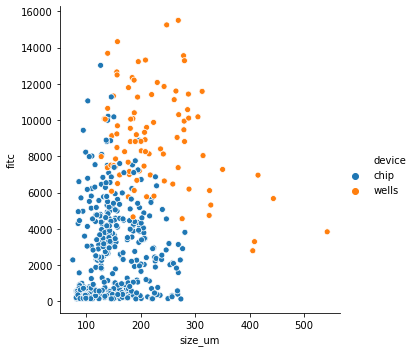

In [73]:
sns.relplot(data=data, x='size_um', y='fitc', hue='device')

In [44]:
data.id.unique()

array(['24092020', '4092020', '26082020', '18092020', '200225', '2',
       'w11062020', '11062020'], dtype=object)

In [51]:
data.device.unique()

array(['chip', 'wells'], dtype=object)

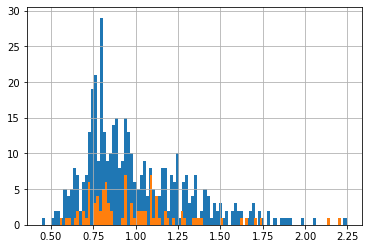

In [59]:
ax = data[data.device == 'chip'].normd_size_um.hist(bins=100, density=False)

data[data.device == 'wells'].normd_size_um.hist(bins=100, density=False, ax=ax)

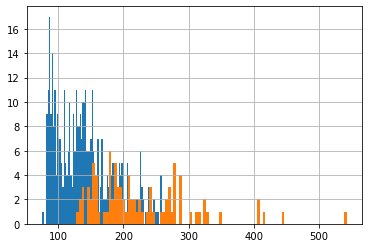

In [60]:
ax = data[data.device == 'chip'].size_um.hist(bins=100, density=False)

data[data.device == 'wells'].size_um.hist(bins=100, density=False, ax=ax)

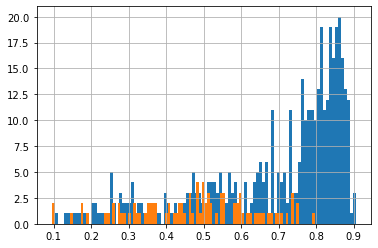

In [61]:
ax = data[data.device == 'chip'].circularity.hist(bins=100, density=False)

data[data.device == 'wells'].circularity.hist(bins=100, density=False, ax=ax)